# Численное дифференцирование и интегрирование

## Конечно-разностная формула на произвольном шаблоне

Написать программу для вычисления приближенного значения производной заданного порядка по значениям функции в заданных узлах.
1. Программа должна содержать функцию, принимающую на вход: массив координат узлов $x_{1}, \ldots, x_{n}$, массив значений функции в узлах $f_{1}, \ldots, f_{n}$, порядок производной $k \geq 1$, и точку $x_{0}$, в которой нужно вычислить значение производной.
2. Функция должна вычислять и возвращать коэффициенты конечно-разностной формулы $a_{1}, \ldots, a_{n}$ и приближенное значение производной $f^{(k)}(x_{0})$.
3. Программа должна содержать тестовый расчет для гладкой функции: функция должна вызываться для последовательности наборов узлов, чтобы величина $x_{i} - x_{0}$ уменьшалась каждый раз вдвое. Программа должна строить график зависимости ошибки от шага $\max{|x_{i} - x_{0}|}$ в логарифмической шкале. На этом же графике нужно нарисовать прямую с углом наклона, равным порядку аппроксимации. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [2]:
def estimate_derivative(grid, func_values, derivative_order, x_0):
    n = grid.shape[0]
    matrix = np.zeros((n, n))
    matrix[0] = np.ones(n)
    
    for i in range(1, n):
        matrix[i] = ((grid - x_0) ** i) / np.math.factorial(i)
    
    vector = np.zeros(n)
    vector[derivative_order] = 1
    
    a = np.linalg.solve(matrix, vector)
    derivative = np.sum(a * func_values)
    
    return a, derivative

In [3]:
def f(x):
    return np.sin(x)

In [4]:
x_0 = 2.
width = 10
num_nodes = 4
num_iter = 50
derivative_order = 3
exact_derivative = -np.cos(x_0)
grid = sts.uniform.rvs(loc = x_0 - width, scale = x_0 + width, size = num_nodes)
error = np.zeros(num_iter)
max_step = np.zeros(num_iter)

for i in range(num_iter):
    func_values = f(grid)
    a, derivative = estimate_derivative(grid, func_values, derivative_order, x_0)
    error[i] = np.abs(derivative - exact_derivative)
    max_step[i] = np.max(np.abs(grid - x_0))
    grid = (grid + x_0) / 2
    
xs = np.linspace(max_step.min(), max_step.max(), 1000)

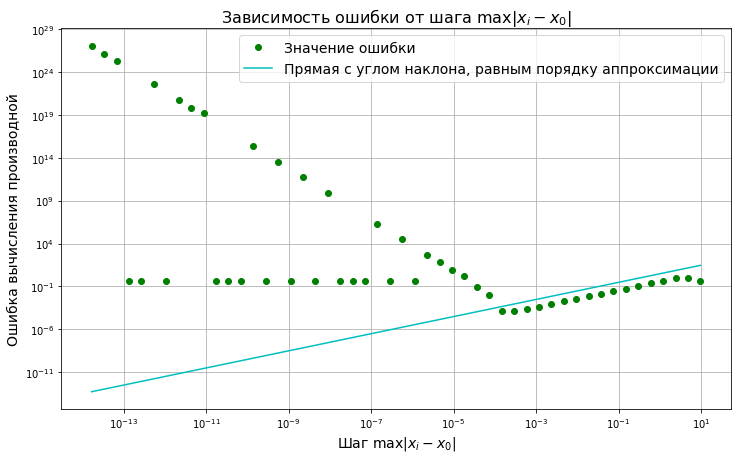

In [5]:
plt.figure(figsize = (12, 7))
plt.loglog(max_step, error, marker = 'o', linestyle = 'none', color = 'g', label = u'Значение ошибки')
plt.loglog(xs, derivative_order * xs, color = 'c', label = u'Прямая с углом наклона, равным порядку аппроксимации')
plt.legend(loc = 'best', prop = {'size': 14})
plt.title(ur'Зависимость ошибки от шага $\max{|x_{i} - x_{0}|}$', fontsize = 16)
plt.xlabel(ur'Шаг $\max{|x_{i} - x_{0}|}$', fontsize = 14)
plt.ylabel(u'Ошибка вычисления производной', fontsize = 14)
plt.grid()
plt.show()